# Линейная классификация

Итак, попробуем найти зависимость вида цветка ириса с длиной и ширной чашелистика. 

In [1]:
from classification_helper import *
import numpy as np

In [2]:
X, kind_iris = get_data()

In [3]:
print_data(X,kind_iris)

   Длина чашелистика Ширина чашелистика       Вид Ириса
0                5.1                3.5     iris setosa
1                4.9                3.0     iris setosa
2                4.7                3.2     iris setosa
3                4.6                3.1     iris setosa
4                5.0                3.6     iris setosa
5                5.4                3.9     iris setosa
6                4.6                3.4     iris setosa
7                5.0                3.4     iris setosa
8                4.4                2.9     iris setosa
9                4.9                3.1     iris setosa
10               5.4                3.7     iris setosa
11               4.8                3.4     iris setosa
12               4.8                3.0     iris setosa
13               4.3                3.0     iris setosa
14               5.8                4.0     iris setosa
15               5.7                4.4     iris setosa
16               5.4                3.9     iris

In [4]:
print(X)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [6.3 3.3]
 [5.8 2.7]
 [7.1 3. ]
 [6.3 2.9]
 [6.5 3. ]
 [7.6 3. ]
 [4.9 2.5]
 [7.3 2.9]
 [6.7 2.5]
 [7.2 3.6]
 [6.5 3.2]
 [6.4 2.7]
 [6.8 3. ]
 [5.7 2.5]
 [5.8 2.8]
 [6.4 3.2]
 [6.5 3. ]
 [7.7 3.8]
 [7.7 2.6]
 [6.  2.2]
 [6.9 3.2]
 [5.6 2.8]
 [7.7 2.8]
 [6.3 2.7]
 [6.7 3.3]
 [7.2 3.2]
 [6.2 2.8]
 [6.1 3. ]
 [6.4 2.8]
 [7.2 3. ]
 [7.4 2.8]
 [7.9 3.8]
 [6.4 2.8]
 [6.3 2.8]
 [6.1 2.6]
 [7.7 3. ]
 [6.3 3.4]
 [6.4 3.1]
 [6.  3. ]
 [6.9 3.1]
 [6.7 3.1]

In [5]:
print(kind_iris)

['iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa' 'iris setosa'
 'iris virginica' 'iris virginica' 'iris virginica' 'iris virginica'
 'iris virginica' 'iris virginica' 'iris virginica' 'iris virginica'
 'iris virginica' 'iris virginica' 'iris virginica' 'iris virginica'
 'iris virginica' 'iris virginica' 'iris virginica' 'iris virginica'
 'iris virgini

Видим, что целевая переменная (вид цветка ириса) имеет формат строки. Иметь целевые метки в формате строки не удобно для компьютера, поэтому закодируем их численными значениями.

Закодируем виды цветков Ириса метками класса:

$iris\ setosa: -1$

$iris\ virginica: 1$

Запишем метки класса в переменную $y$

In [6]:
y = kind_iris.copy() #!Зачем вызывается метод copy?
y[y=='iris setosa'] = -1
y[y=='iris virginica'] = 1
y = y.astype(int)
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


In [7]:
print_data(X,y)

    Длина чашелистика  Ширина чашелистика  Вид Ириса
0                 5.1                 3.5       -1.0
1                 4.9                 3.0       -1.0
2                 4.7                 3.2       -1.0
3                 4.6                 3.1       -1.0
4                 5.0                 3.6       -1.0
5                 5.4                 3.9       -1.0
6                 4.6                 3.4       -1.0
7                 5.0                 3.4       -1.0
8                 4.4                 2.9       -1.0
9                 4.9                 3.1       -1.0
10                5.4                 3.7       -1.0
11                4.8                 3.4       -1.0
12                4.8                 3.0       -1.0
13                4.3                 3.0       -1.0
14                5.8                 4.0       -1.0
15                5.7                 4.4       -1.0
16                5.4                 3.9       -1.0
17                5.1                 3.5     

Отлично. Теперь у нас есть признаки и численная переменная, которую требуется предсказать.

Для предсказания меток класса по длине и ширине чашелистика, попробуем воспользоваться уже известным нам методом *линейная регрессия*:
\begin{equation*}
\tilde{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2.
\end{equation*}
$\tilde{y}$ - Ответ модели  
$x_1$ - Длина чашелистика  
$x_2$ - Ширина чашелистика  
$\theta_0, \theta_1, \theta_2$ - параметры модели (веса)

Но как мы знаем, линейная регрессия выдает ответы в непрерывном диапазоне, а нам нужны ответы принимающие значения -1 или 1.

Для решения этой проблемый воспользуемся функцией знака от ответов линейной регрессии:

\begin{equation*}
\tilde{y} = sign(\theta_0 + \theta_1 x_1 + \theta_2 x_2), \\
 sign(t) = 
 \begin{cases}
   1, &\text{t > 0}\\
   0, &\text{t = 0}\\
   -1, &\text{t < 0}
 \end{cases}
\end{equation*}

\begin{equation*}
 sign(t) = 
 \begin{cases}
   1, &\text{t > 0}\\
   0, &\text{t = 0}\\
   -1, &\text{t < 0}
 \end{cases}
\end{equation*}

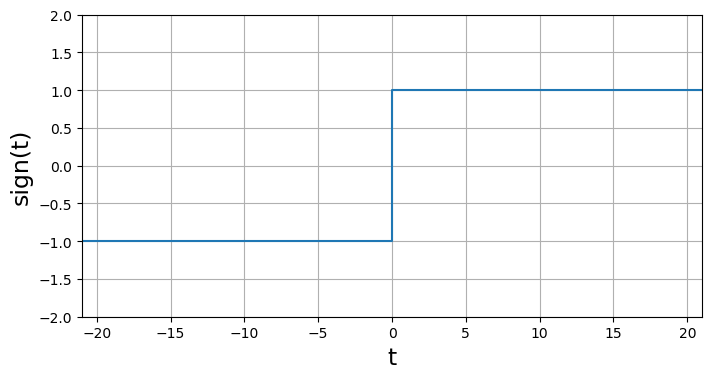

In [8]:
plot_sign()

Избавимся от свободного члена $\theta_0$  и запишим выражение в вектором виде:

\begin{equation*}
{X} = \begin{pmatrix} 1 & x_{1} & x_{2}\end{pmatrix} \\
\Theta = \begin{pmatrix}\theta_0 &  \theta_1 & \theta_2\end{pmatrix}^T \\
\tilde{y}= sign(\begin{pmatrix} 1 & x_{1} & x_{2}\end{pmatrix} \begin{pmatrix}
    \theta_0\\
    \theta_1\\
    \theta_2\\
  \end{pmatrix}) =  sign(1 \cdot \theta_0 + \theta_1 x_{1} + \theta_2 x_{2}) \\
\tilde{y} = sign(X\Theta)
\end{equation*}


Итак, мы попытались предсказать метки класса линейной регрессией, давайте разберемся какое геометричесское объяснение есть у такой модели классификации.
Визуализируем данные:

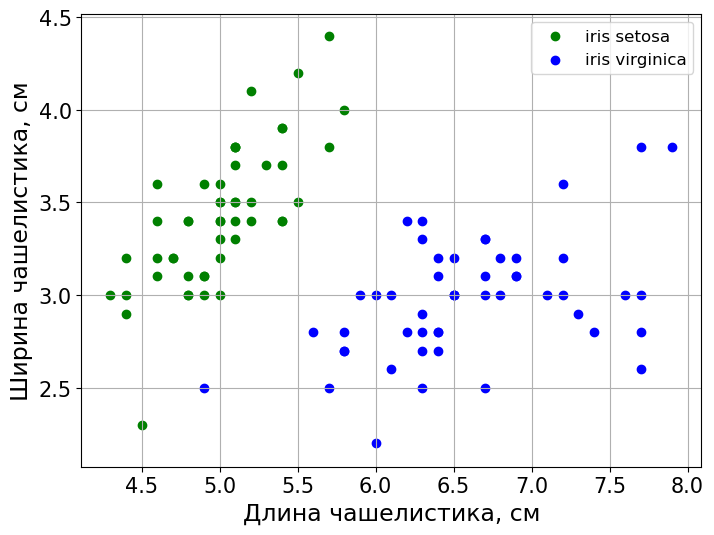

In [9]:
plot_data(X,kind_iris)

Как видим, наши классы (виды цветка ириса) приблизительно разделимы линией, значит имеет смысл построить такую разделяющую линию, чтобы это выглядело приблизтельно вот так:

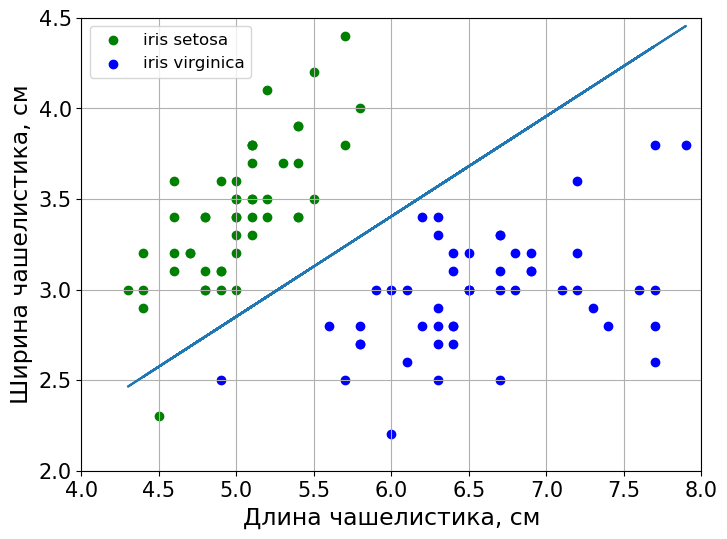

In [10]:
plot_dividing_line_iris(X, kind_iris)

Как нам построить такую разделяющую прямую?

Как мы знаем из школы, уравнение прямой имеет следующий вид:
\begin{equation*}
y = kx+b
\end{equation*}

В общем виде это уравнение записывается вот так:

\begin{equation*}
k_1x + k_2y+b = 0
\end{equation*}

Перепишем уравнение прямой в наших обозначениях:

\begin{equation*}
\theta_0 + \theta_1x_1 + \theta_2x_2 = 0 \\
\end{equation*}

В нашем примере всего два признака (длина и ширина чашелистика), в этом случае мы можем построить разделяющую прямую.

Аналогично, если у нас $N$ признаков, мы можем построить **разделяющую гиперплоскость** в $N$ мерном пространстве:

\begin{equation*}
\theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_Nx_N = 0 \\
\sum_{i=0}^N\theta_ix_i = 0\\
x_0=1
\end{equation*}

Или в матричном виде:
\begin{equation*}
X\Theta = 0.
\end{equation*}

Итак, мы построили прямую $X\Theta = 0$. 

Проанализируем, как будет меняться ответ модели $\tilde{y_i} = sign(X_i\Theta)$ от геометрического расположения объекта $X_i$

In [11]:
visualize_classification()

interactive(children=(FloatSlider(value=0.0, description='$dx_1$, $dx_2$:', max=8.0, min=-2.0, step=0.415), Ou…

Мы выяснили, что:

Уравнение $X\Theta = 0$ задает гиперплоскость в пространстве признаков $X$ с вектором весов $\Theta$.


 * Если $X_i\Theta > 0$, то признаки попали по одну сторону от гиперплоскости

 * Если $X_i\Theta < 0$, то признаки попали по другую сторону от гиперплоскости.

А это значит, что наш *линейный классификатор*
\begin{equation*}
\tilde{y_i} = sign(X_i\Theta),
\end{equation*}
будет давать метку

* -1, если точки лежат по одну сторону от гиперплоcкости
* 1, если точки лежать по другую сторону от гиперплоскости

Итак, *линейный классификатор* строит **разделяющую гиперплоскость** в пространстве признаков.

Более подробную информацию про гиперплоскости можно прочитать ниже нажав на заголовок.

<details>
<summary>Краткие сведения из линейной алгебры </summary>
<p>

*Скалярное проиведение* векторов $\overline a,  \overline b \in \mathbb{R}^N$:

$\langle \overline a, \overline b \rangle = \sum_{i=1}^N a_ib_i = \| \overline{a}\|\| \overline{b}\|cos(\widehat{ \overline{a},\overline{b}})$.

$\|\cdot\|$ - норма вектора (длина)

**Гиперплоскость** - подпространство векторного пространства, размерности на 1 меньше исходного пространства.

Пример:
* Плоскость в трехмерном пространстве
* Прямая на плоскости
* Точка на прямой
* Трехмерное пространство в четырехмерном

Ненулевой вектор $\overline{n}$, ортогональный гиперплоскости, называется нормальным вектором или **нормалью** к этой гиперплоскости.

Так как все вектора принадлежащие гиперплоскости будут ортогональны ее вектору нормали, а скалярное произведение ортогональных векторов равно нулю, то мы можем записать уравнение гиперплоскости через скалярное произведение с вектором нормали:

**Общее уравнение гиперплоскости в $N$ мерном пространстве**

Пусть $\overline n\ - $ вектор нормали:
\begin{equation*}
\overline n = (A_1, A_2, ..., A_N)
\end{equation*}
Тогда уравнение гиперплоскости запишем, как:

\begin{equation*}
A_0 + \langle \overline n, \overline X \rangle = 0, \\
\overline X = (x_1, x_2, ...,x_N)
\end{equation*}
или
\begin{equation*}
\sum_{i=0}^N A_ix_i = 0, \\
x_0 = 1.
\end{equation*}
При этом
\begin{equation*}
\sum_{i=1}^N A_i^2 \neq 0.
\end{equation*}

**Пример**: уравнение прямой на плоскости:
\begin{equation*}
A_0 + A_1x_1 + A_2x_2 = 0, \\
\overline{n} = (A_1, A_2)
\end{equation*}
![](gipyerploskosti.jpg?raw=true)

Раз уравнение гиперплоскости определяется скалярным произведением с вектором нормали $\overline{n}$, а знак скалярного произведения определяется косинусом угла между векторами, то:
* все точки $X$ лежище со стороны от разделяющей гиперплоскости куда указывает вектор нормиали, будут иметь с вектором нормали $\overline{n}$ положительное скалярное произведение ($cos(\widehat{ \overline{n},\overline{X}})\gt 0)$
* все точки $X$ лежащие по другую сторону от гиперплоскостии (противоположная сторона от направления вектора нормали), будут иметь отрицательное скалярное проиведение ($cos(\widehat{ \overline{n},\overline{X}})\lt 0)$
* все точки $X$ лежащие на гиперплоскости имеют нулевое скалярное произведение с вектором нормали ($cos(\widehat{ \overline{n},\overline{X}}) = 0)$

Приминительно к задаче классификации, вектором нормали к разделяющей гиперплоскости будет вектор параметров $(\theta_1, \theta_2, ..., \theta_n)$. А ответом линейной модели классификации будет служить скалярное произведение вектора признаков $X$ на вектор нормали $(\theta_1, \theta_2, ..., \theta_n)$ + смещение $\theta_0$

</p>
</details> 

Посмотрим, как будет меняться разделяющая гиперплоскость в зависмости от параметров $\Theta$.

Уравнение гиперплоскости: $\theta_0 + \theta_1x_1 + \theta_2x_2 = 0$ или $X\Theta = 0$

In [12]:
plot_data_with_gip(X,kind_iris)

interactive(children=(FloatSlider(value=-0.92533091, description='theta_0: ', max=0.0, min=-1.8, step=0.3), Fl…

Осталось научиться подбирать параметры $\Theta$.

Как и в задачи регрессии, для поиска весов модели $\Theta$, требуется задать функцию ошибки.

Введем следующие обозначения:

$X$ - матрица признаков

$y$ - истинные метки

$X_i = \begin{pmatrix} 1&  x_{i,1} & x_{i,2}\end{pmatrix}$ - признаки $i$-го объекта ($i$-го цветка Ириса)

$y_i \in$ {-1,1} - истинная метка на $i$-м объекте

$\Theta = \begin{pmatrix}\theta_0 &  \theta_1 & \theta_2\end{pmatrix}^T$

Введем понятие отступа на $i$-ом объекте:

\begin{equation*}
M_i = y_i \cdot X_i\Theta
\end{equation*}
Замети, что
* $M_i > 0$, классификатор дал верный ответ

* $M_i < 0$, классификатор ошибся

Давайте оценивать ошибку классификации, как **долю неправильных ответв**:
    
\begin{equation*}
L = \dfrac{1}{N}\sum_{i=1}^N [M_i<0],\\
\begin{cases}
[True] = 1, \\
[False] = 0.
\end{cases}
\end{equation*}


Но к сожалению функция $f(M_i) = [M_i < 0]$ разрывна и имеет нулевую производную всюду кроме нуля.

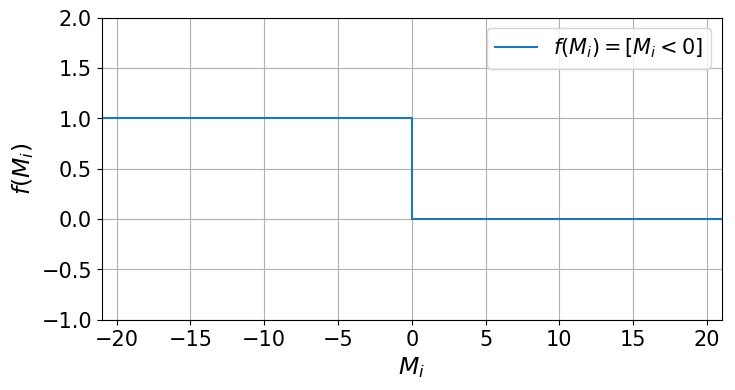

In [13]:
plot_indent()

Минимизировать такую функцию не просто.

Оценим сверху функцию $f(M_i) = [M_i < 0]$ гладкой функцией $g(M_i)$:
    
\begin{equation*}
f(M_i) \leqslant g(M_i)
\end{equation*}

Тогда минимизируя $g(M_i)$, должна минимизироваться и $f(M_i)$:

\begin{equation*}
g(M_i) \xrightarrow {\Theta} min \Rightarrow f(M_i) \xrightarrow {\Theta} min.
\end{equation*}

Тогда суммарная ошибка по обучающей выборке (доля неправильных ответов), оценится, как:
\begin{equation*}
L = \dfrac{1}{N}\sum_{i=1}^N [M_i<0] \leqslant \tilde L = \dfrac{1}{N}\sum_{i=1}^N g(M_i).
\end{equation*}



Примеры гладкой функции $g(M_i)$:


1. $[M_i<0] \leqslant (1 - M_i)^2$ - квадратичная аппроксимация
2. $[M_i<0] \leqslant max(0,1 - M_i)$ - кусочно линейная (Hinge loss, метод опорных векторов)
3. $[M_i<0] \leqslant e^{-M_i}$ - экспоненциальная
4. $[M_i<0] \leqslant \log_{2}(1 + e^{-M_i})$ - логистическая (Log loss, логистическая регрессия) 

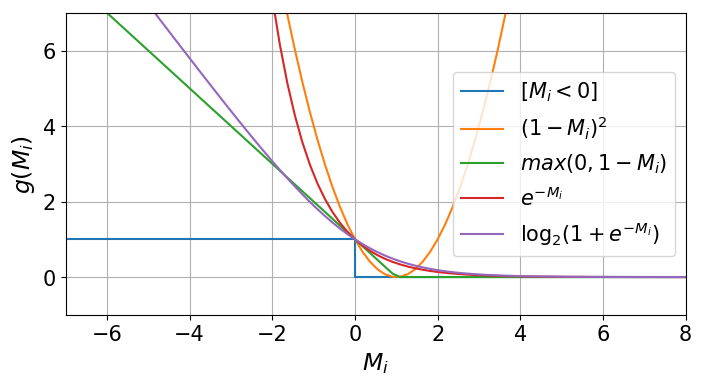

In [14]:
plot_indent_with_maj()

Рассмотрим логистичесскую аппроксимацию $g(M_i) = \log_2(1 + e^{-M_i})$:

\begin{equation*}
\tilde L = \dfrac{1}{N}\sum_{i=1}^N g(M_i)\\
\tilde L = \dfrac{1}{N}\sum_{i=1}^N \log_2(1 + e^{-M_i})\\
\tilde L = \dfrac{1}{N}\sum_{i=1}^N \log_2(1 + e^{-y_i \cdot X_i\Theta})
\end{equation*}

Теперь наша функция гладкая, от нее можно брать производные и искать минимум.

Напомню производную от логарифма:
\begin{equation*}
f(t) = \log_at \\
f'(t) = \dfrac{1}{t\ln(a)}
\end{equation*}

Где $\ln$ - натуральный логарифм (по основанию $e$).

Расчитаем частную производную по всесу $\theta_j$:

\begin{equation*}
\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j} = \dfrac{\partial}{\partial \theta_j}(\dfrac{1}{N} \sum_{i=1}^{N}\log_2(1 + e^{- y_i \cdot X_i\Theta})
\end{equation*}

\begin{equation*}
\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j} = \dfrac{1}{N\ln2} \sum_{i=1}^{N}\dfrac{1}{1 + e^{-y_i \cdot X_i\Theta}}\dfrac{\partial (1 + e^{-y_i \cdot X_i\Theta})}{\partial \theta_j}
\end{equation*}

\begin{equation*}
\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j} = \dfrac{1}{N\ln2} \sum_{i=1}^{N}\dfrac{-y_ie^{-y_i \cdot X_i \Theta }}{1 + e^{-y_i \cdot X_i\Theta}}\dfrac{\partial X_i\Theta}{\partial \theta_j}
\end{equation*}

\begin{equation*}
\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j} = \dfrac{1}{N\ln2} \sum_{i=1}^{N}\dfrac{-y_ie^{-y_i \cdot X_i \Theta }}{1 + e^{-y_i \cdot X_i\Theta}}x_{i,j}
\end{equation*}

Применим алгоритм градинтного спуска для поиска оптимальных весов $\Theta$

$\theta_{j_{new}} = \theta_j - \alpha \dfrac{\partial \tilde L(\Theta)}{\partial \theta_j}$  
$\theta_{j_{new}} = \theta_j - \alpha  \dfrac{1}{N\ln2} \sum_{i=1}^{N}\dfrac{y_ie^{y_i \cdot X_i \Theta }}{1 + e^{y_i \cdot X_i\Theta}}x_{i,j}$.

$x_{i, 0} = 1$

Для удобства коэффициент $\dfrac{1}{\ln2}$ можно убрать в $\alpha$, $\alpha=\dfrac{\alpha}{\ln2}$. В дальнейшем будем его опускать.

Тогда обновление вектора $\Theta$ будет выглядеть следующим образом:
 
\begin{equation*}
   \theta_{0_{new}} = \theta_0 - \alpha \dfrac{1}{N} \sum_{i=1}^{N}\dfrac{-y_ie^{-y_i \cdot X_i \Theta }}{1 + e^{-y_i \cdot X_i\Theta}}x_{i,0}\\
   \theta_{1_{new}} = \theta_1 - \alpha  \dfrac{1}{N} \sum_{i=1}^{N}\dfrac{-y_ie^{-y_i \cdot X_i \Theta }}{1 + e^{-y_i \cdot X_i\Theta}}x_{i,1}\\
   \theta_{2_{new}} = \theta_2 - \alpha  \dfrac{1}{N} \sum_{i=1}^{N}\dfrac{-y_ie^{-y_i \cdot X_i \Theta }}{1 + e^{-y_i \cdot X_i\Theta}}x_{i,2}
\end{equation*}

Выполняем данную процедуру в цикле заданное число раз, либо пока наши параметры не перестанут изменяться на величину меньшую, чем некоторая нами заданная величина.

Реализуем градиентный спуск.

Для начала добавим столбец единиц к матрице признаков.

In [15]:
def create_data(X):
    X_ones = np.ones(X.shape[0])
    return np.column_stack([X_ones, X])

X_train = create_data(X)

Зададим начальные параметры весов $\Theta$ случайными значениями от 0 до 1:

In [16]:
Theta = np.random.random_sample(size=(X_train.shape[1],))
print(Theta)

[8.34692300e-04 8.37412583e-01 9.10646048e-01]


Реализуем подсчет градиента: $\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j} = \dfrac{1}{N} \sum_{i=1}^{N}\dfrac{-y_ie^{-y_i \cdot X_i \Theta }}{1 + e^{-y_i \cdot X_i\Theta}}x_{i,j}$

In [17]:
def gradient_function(Theta, X_train, y):
    grad = np.zeros_like(Theta)
    for j in range(Theta.shape[0]):       
        grad[j] = np.mean(X_train[:, j] * (-y)*np.e**(-y * (X_train.dot(Theta)))/(1 + np.e** (-y * (X_train.dot(Theta)))))
    return grad

Градиентный спуск

$\theta_{j_{new}} = \theta_j - \alpha \dfrac{\partial \tilde L(\Theta)}{\partial \theta_j}$  

In [18]:
def gradient_descent(Theta, X_train, y, alpha, iters):        
    theta = Theta
    for i in range (iters):
        theta = theta - alpha * gradient_function(theta, X_train, y)
    return theta

In [19]:
theta_opt = gradient_descent(Theta, X_train, y, 0.01, 1000)

In [20]:
theta_opt

array([-0.48861716,  0.90290579, -1.43980125])

Реализуем линейную модель классификации от наших параметров и данных

In [21]:
def predict_function(X_train, theta):
    y_pred = np.dot(X_train, theta) #X @ Theta
    return np.sign(y_pred)

y_pred = predict_function(X_train, theta_opt)

Реализуем подсчет ошибки (доля неверно классифицированных объектов)

In [22]:
def error(y, y_pred):
    return np.mean(y_pred != y)
error(y, y_pred)

0.01

Итак, мы обучили модель линейной классификации:
\begin{equation*}
y = sign(X\Theta) = sign(\theta_0 + \theta_1x_1 + \theta_2x_2)
\end{equation*}

Модель задает разделяющую гиперплоскость:
\begin{equation*}
\theta_0 + \theta_1x_1 + \theta_2x_2 = 0
\end{equation*}
В случае, когда у нас всего два признака $x_1,x_2$, гиперплоскостью является прямая на плоскости.

Запишем уравнение прямой в привычном виде ($y=kx+b)$ и построим ее график:

\begin{equation*}
\theta_0 + \theta_1x_1 + \theta_2x_2 = 0 \\
x_2 = - \dfrac{\theta_0}{\theta_2} - \dfrac{\theta_1}{\theta_2}x_1
\end{equation*}

In [23]:
theta_opt

array([-0.48861716,  0.90290579, -1.43980125])

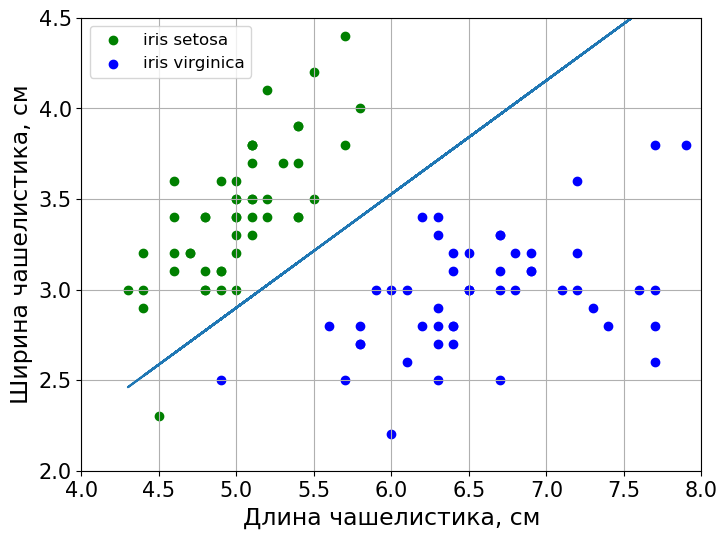

In [24]:
plot_finaly_trained_model(X, kind_iris, theta_opt)

### Вывод
1. Линейный классификатор проводит *разделяющую гиперплоскость* в пространстве признаков.
2. Если ответ классификатора $X\Theta > 0$ мы ставим метку $1$, если $X\Theta < 0$ ставим метку $-1$.
3. При обучении классификатора мы минимизируем долю неверных ответов.
4. Но так как функция "доля неверных ответов" разрывна, мы ее оцениваем сверху гладкой функцией g($\cdot$) и надеемся, что минимизировав g($\cdot$), мы минимизируем и долю неверных ответов.